# Import necessary libraries


In [41]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns 


# Load Dataset & handle missing values

In [42]:
df=pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [44]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [45]:
df['InternetService'].fillna(df['InternetService'].mode() , inplace=True)

In [46]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [47]:
df['ContractType'].value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

In [48]:
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

In [49]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,0,1,353.40,1,1
1,2,43,1,0,36.67,0,1,0.00,1,1
2,3,51,0,2,63.79,0,1,127.58,0,1
3,4,60,0,8,102.34,1,0,818.72,1,1
4,5,42,1,32,69.01,0,2,2208.32,0,1


# Data Visualization

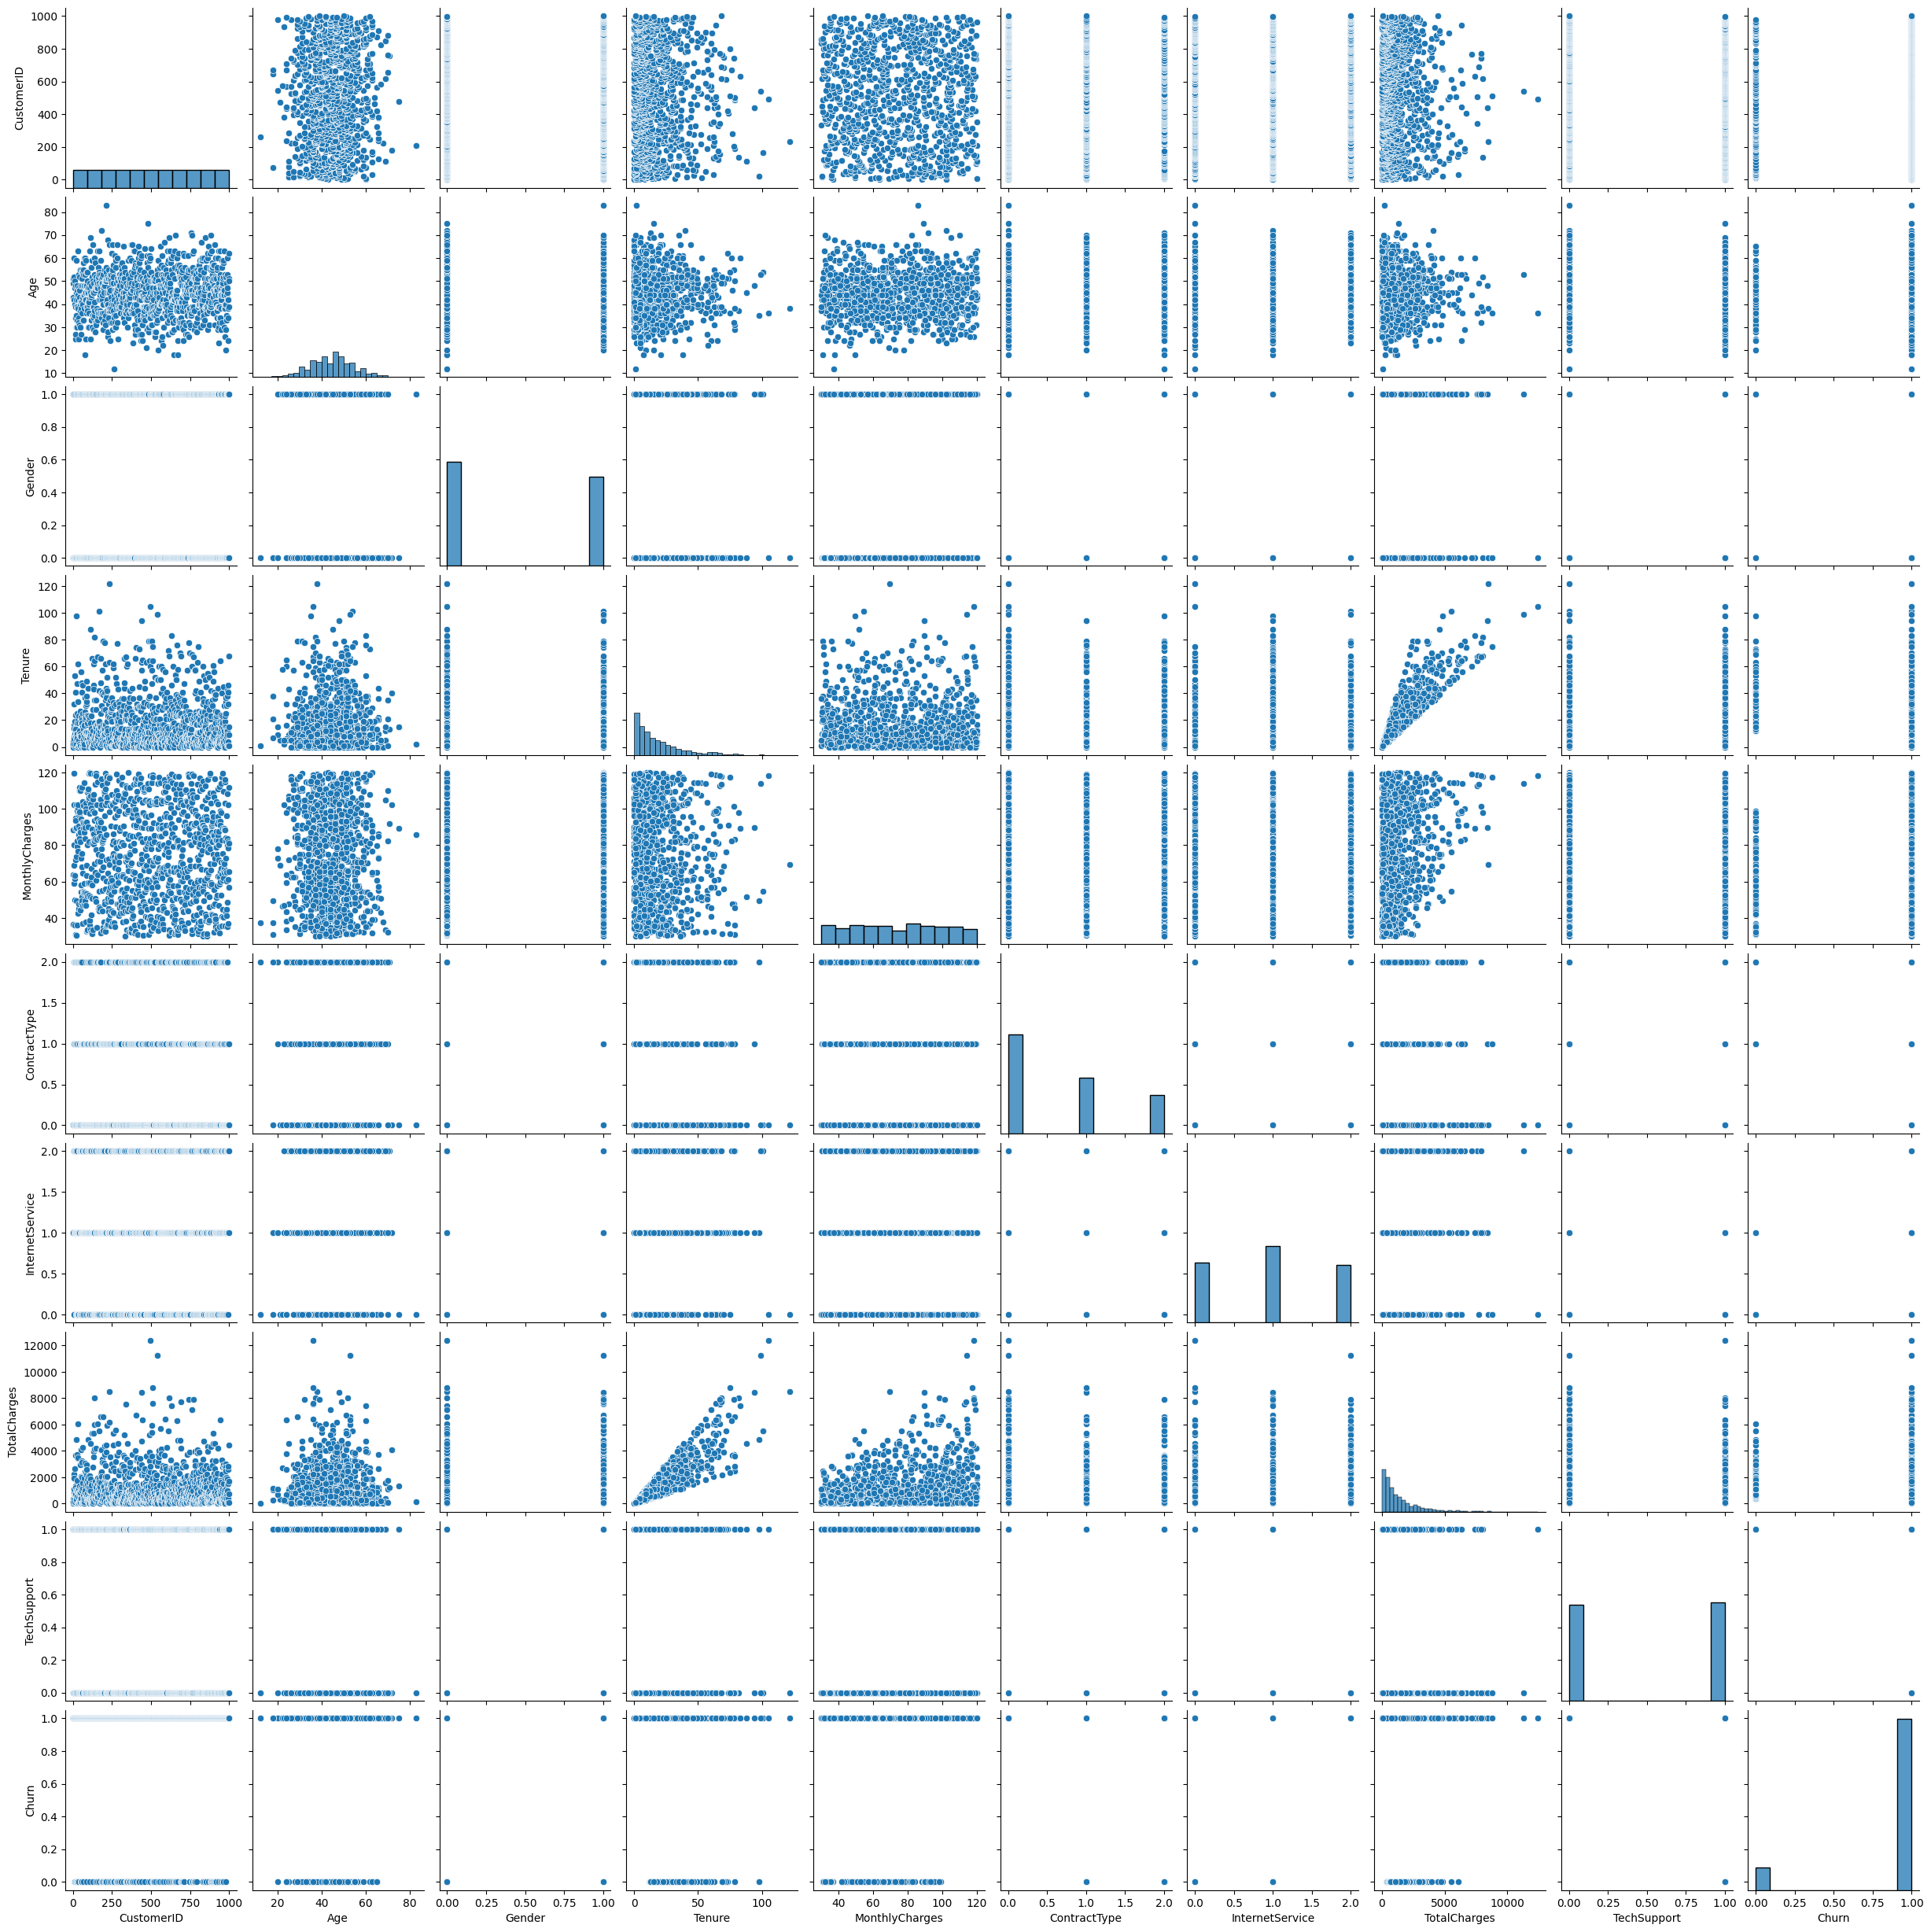

In [50]:
sns.pairplot(df)

# Split data into train & test

In [51]:
x = df.drop(['Churn' , 'CustomerID'] , axis=1)
y=df['Churn']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define Models to test

In [53]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [54]:
# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
# Evaluate each model
for i in models:
    obj=models[i]
    obj.fit(x_train , y_train)
    obj_pred=obj.predict(x_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred)
    recall = recall_score(y_test, obj_pred)
    f1 = f1_score(y_test, obj_pred)
    
    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    
    
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest     1.000   1.000000  1.000000  1.000000
1                  SVM     0.885   0.885000  1.000000  0.938992
2  K-Nearest Neighbors     0.870   0.883249  0.983051  0.930481
3  Logistic Regression     0.905   0.938889  0.954802  0.946779
4        Decision Tree     1.000   1.000000  1.000000  1.000000
5          Naive Bayes     0.905   0.993750  0.898305  0.943620


c:\Users\Ahmed Ashraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


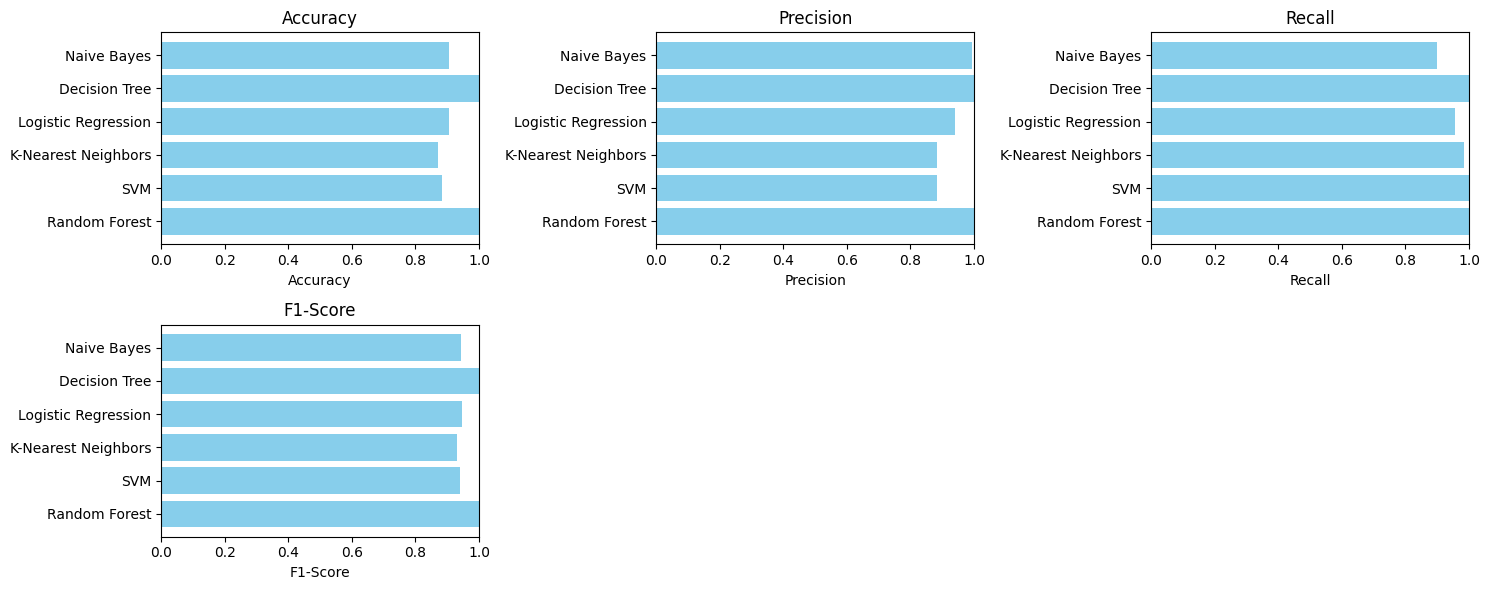

In [55]:
# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(15 , 6))

for i , metrics in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metrics], color='skyblue')
    plt.title(metrics)
    plt.xlim(0, 1)
    plt.xlabel(metrics)

plt.tight_layout()
plt.show()